## <center> Exploratory Data Analysis (EDA) </center>

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
# %run 00_lib_sqlwriter.ipynb
%run 00_lib_preprocessing.ipynb

### Load data

In [3]:
volumes_df = pd.read_excel('data/volumes.xlsx')
archives_df = pd.read_excel('data/archives.xlsx')
articles_df = pd.read_excel('data/articles.xlsx')
contents_df = pd.read_excel('data/contents.xlsx')
authors_df = pd.read_excel('data/authors.xlsx')

articles_contents_df = pd.read_excel('data/archives_articles_contents.xlsx')
authors_articles_df = pd.read_excel('data/authors_articles.xlsx')

In [4]:
row, column = volumes_df.shape
print(f'Volumes data shape: {row}, {column}')

row, column = archives_df.shape
print(f'Archives data shape: {row}, {column}')

row, column = articles_df.shape
print(f'Articles data shape: {row}, {column}')

row, column = contents_df.shape
print(f'Contents data shape: {row}, {column}')

row, column = authors_df.shape
print(f'Authors data shape: {row}, {column}')

# row, column = articles_contents_df.shape
# print(f'articles_contents data shape: {row}, {column}')

# row, column = authors_articles_df.shape
# print(f'authors_articles data shape: {row}, {column}')

Volumes data shape: 39, 3
Archives data shape: 353, 8
Articles data shape: 2677, 16
Contents data shape: 2674, 6
Authors data shape: 3743, 1


#### Overall statistics of data frames

In [5]:
# # Archives data
# archives_df.describe(include='all')

In [6]:
# # Articles data
# articles_df.describe(include='all')

In [7]:
# # Contents data
# contents_df.describe(include='all')

#### Check Missing Values

In [8]:
# Missing Values for Archives
missing_values = archives_df.isnull().sum()
print(missing_values)

archive_url                   0
volume_number                 0
archive_title               335
archive_title_clean         353
archive_publication_date      0
editor                      342
import_date                   0
status                        0
dtype: int64


In [9]:
# Missing Values for Articles
missing_values = articles_df.isnull().sum()
print(missing_values)

article_url                    0
article_title                  2
article_title_clean          264
doi                            7
article_publication_date       0
author                         2
author_clean                 264
keyword                     1583
abstract                      55
abstract_clean               264
archive_url                    0
content_url                    3
import_date                    0
status                         0
lang                         264
abstract_clean_en            264
dtype: int64


In [10]:
# Missing Values for Contents
missing_values = contents_df.isnull().sum()
print(missing_values)

content_url            0
iframe_url             0
content                0
content_clean          0
lang                 261
content_clean_en    2674
dtype: int64


In [11]:
# Missing Values for Article_Contents
missing_values = articles_contents_df.isnull().sum()
print(missing_values)

article_url                     0
article_title                   0
article_title_clean             0
article_publication_date        0
author                          0
author_clean                    0
keyword                      1320
abstract                        0
abstract_clean                  0
abstract_clean_en               0
lang                            0
archive_url                     0
archive_title                2247
archive_title_clean          2413
archive_publication_date        0
content_url                     0
content                         0
content_clean                   0
abstract_content_clean_en       0
dtype: int64


#### Number of Valid Records

In [12]:
row_archive, column_archive = archives_df.shape
filtered_archives_df = archives_df[archives_df.archive_title.notna()]
print (f"Archives: {row_archive} volumes")
display (filtered_archives_df.tail(1))

row_article, column_article = articles_df.shape
filtered_articles_df = articles_df[articles_df.abstract.notna()]
print (f"Articles: {row_article}")
display (articles_df.tail(1))

row_content, column_content = contents_df.shape
print (f"Contents: {row_content}")
display (contents_df.tail(1))

Archives: 353 volumes


,archive_url,volume_number,archive_title,archive_title_clean,archive_publication_date,editor,import_date,status
327,https://firstmonday.org/ojs/index.php/fm/issue...,"Volume 30, Number 1 - 6 January 2025",Women and STEM,NaN,2025-01-14,Antony Bryant,2025-03-12 18:43:39,COMPLETED


Articles: 2677


,article_url,article_title,article_title_clean,doi,article_publication_date,author,author_clean,keyword,abstract,abstract_clean,archive_url,content_url,import_date,status,lang,abstract_clean_en
2676,https://firstmonday.org/ojs/index.php/fm/artic...,The Hi-Tech Gift Economy,the hi-tech gift economy,https://doi.org/10.5210/fm.v3i12.631,1998-12-07,Richard Barbrook,Richard Barbrook,NaN,"During the Sixties, the New Left created a ne...","during the sixties, the new left created a ne...",https://firstmonday.org/ojs/index.php/fm/issue...,https://firstmonday.org/ojs/index.php/fm/artic...,2025-03-13 19:24:22,COMPLETED,en,"during the sixties, the new left created a ne..."


Contents: 2674


,content_url,iframe_url,content,content_clean,lang,content_clean_en
2673,https://firstmonday.org/ojs/index.php/fm/artic...,https://firstmonday.org/ojs/index.php/fm/artic...,Mobile learning and student engagement in remo...,mobile learning and student engagement in remo...,en,NaN


### Articles and Contents data

In [13]:
row, column = articles_df.shape
print (f"Number of articles in First Monday: {row}")

articles_contents_df = articles_contents_df[articles_contents_df['abstract_clean'].notna() & (articles_contents_df['abstract_clean'] != '')]
row, column = articles_contents_df.shape
print (f"Number of research papers: {row}")

# non_articles_contents_df = articles_df[articles_df['abstract_clean'].isna() | (articles_df['abstract_clean'] == '')]
non_articles_contents_df = articles_df[
    (articles_df['abstract_clean'].isna() | (articles_df['abstract_clean'] == '')) &
    (~articles_df['content_url'].isna() & (articles_df['content_url'] != ''))
]
row, column = non_articles_contents_df.shape
print (f"Number of non research papers (i.e. book Reviews, letter to editors, interviews, etc.): {row}")

invalid_articles_df = articles_df[articles_df['content_url'].isna() | (articles_df['content_url'] == '')]
row, column = invalid_articles_df.shape
print (f"Number of invalid articles: {row}")

# display (articles_contents_df.head(1))

Number of articles in First Monday: 2677
Number of research papers: 2413
Number of non research papers (i.e. book Reviews, letter to editors, interviews, etc.): 261
Number of invalid articles: 3


### Word Count Distribution (research papers only)

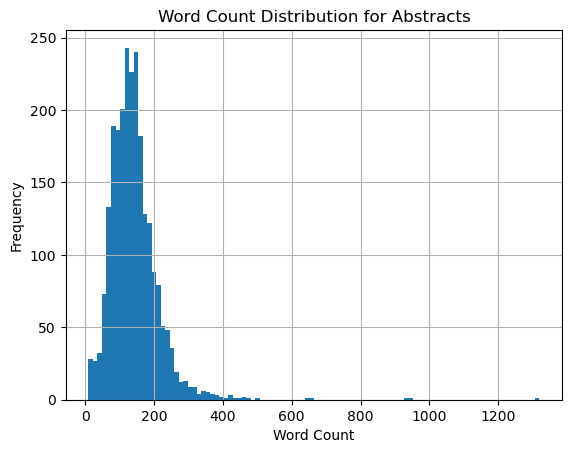

In [14]:
# create new column 'abstract_length' from abstract_clean which contain count of words in abstract
# articles_contents_df['abstract_length'] = articles_contents_df['abstract'].str.split().str.len()
articles_contents_df['abstract_length'] = (
    articles_contents_df['abstract']
    .fillna('')  # Handle missing content
    .str.strip()  # Remove leading/trailing spaces
    .str.split()  # Split into words
    .str.len()  # Count the words
)

# display histogram of 'abstract_length'
articles_contents_df['abstract_length'].hist(bins=100)
plt.title("Word Count Distribution for Abstracts")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

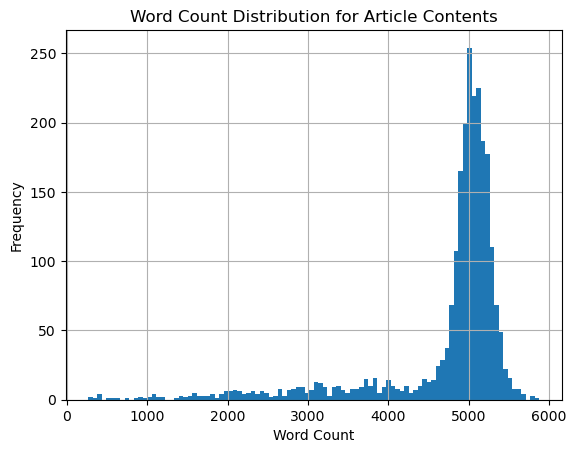

In [15]:
# create new column 'content_length' from content_clean which contain count of words in content
# articles_contents_df['content_length'] = articles_contents_df['content'].str.split().str.len()
articles_contents_df['content_length'] = (
    articles_contents_df['content']
    .fillna('')  # Handle missing content
    .str.strip()  # Remove leading/trailing spaces
    .str.split()  # Split into words
    .str.len()  # Count the words
)

# display histogram of 'abstract_length'
articles_contents_df['content_length'].hist(bins=100)
plt.title("Word Count Distribution for Article Contents")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

In [16]:
# create new column 'content_length' from content_clean which contain count of words in content
articles_contents_df['content_length'] = (
    articles_contents_df['content']
    .fillna('')  # Handle missing content
    .str.strip()  # Remove leading/trailing spaces
    .str.split()  # Split into words
    .str.len()  # Count the words
)

# Calculate total word count across all documents
total_words = articles_contents_df['content_length'].sum()
print(f"Total words across all documents: {total_words:,}")

Total words across all documents: 11,409,789


In [17]:
articles_contents_df['content_length'] = pd.to_numeric(articles_contents_df['content_length'], errors='coerce')
print(f"Mean document length {round(articles_contents_df['content_length'].mean(),2)}.")

Mean document length 4728.47.


In [18]:
# Estimated number of words after preprocessing

text_preprocessor = TextPreprocessor()
tqdm.pandas(desc="Preprocessing texts")
articles_contents_df['abstract_content_clean_en'] = articles_contents_df['abstract_content_clean_en'].fillna('')
articles_contents_df['abstract_content_clean_en'] = articles_contents_df['abstract_content_clean_en'].progress_apply(text_preprocessor.preprocess_text)
articles_contents_df['abstract_content_clean_en'] = articles_contents_df['abstract_content_clean_en'].progress_apply(text_preprocessor.remove_stop_words)
articles_contents_df['abstract_content_clean_en'] = articles_contents_df['abstract_content_clean_en'].progress_apply(text_preprocessor.lemmatize)

articles_contents_df['content_length_clean'] = (
    articles_contents_df['abstract_content_clean_en']
    .fillna('')  # Handle missing content
    .str.strip()  # Remove leading/trailing spaces
    .str.split()  # Split into words
    .str.len()  # Count the words
)

# Calculate total word count across all documents
total_words = articles_contents_df['content_length_clean'].sum()
print(f"Total words across all documents after preprocessing: {total_words:,}")

articles_contents_df['content_length_clean'] = pd.to_numeric(articles_contents_df['content_length_clean'], errors='coerce')
print(f"Mean document length after preprocessing {round(articles_contents_df['content_length_clean'].mean(),2)}.")

Preprocessing texts: 100%|██████████| 2413/2413 [00:10<00:00, 231.96it/s]


Total words across all documents after preprocessing: 233,155
Mean document length after preprocessing 96.62.


### Number of Authors 
(for research papers only, excluding interviews, editorials, book reviews, etc.)

In [19]:
# Get authors
row, column = authors_df.shape
print("Number of authors:", row)

Number of authors: 3743


In [20]:
# # Count the number of articles by each author
# author_counts = authors_articles_df['author_name'].value_counts().reset_index()
# author_counts.columns = ['Author', 'Number of Articles']

import unicodedata

# Merge with research papers
authors_articles_df = pd.merge(authors_articles_df, articles_contents_df, on="article_url", how="inner")

# Ensure everything is a string, handle NaNs gracefully, and convert to ASCII only
authors_articles_df['author_name_normalized'] = (
    authors_articles_df['author_name']
    .astype(str)  # Convert any floats (NaNs) to 'nan' string
    .apply(lambda x: unicodedata.normalize('NFKD', x).encode('ASCII', 'ignore').decode('utf-8') if x != 'nan' else '')
    .str.replace(r'\s+', ' ', regex=True)  # Replace multiple spaces with one
    .str.strip() # Remove leading/trailing spaces
    .str.title() # To proper case
)

# Count articles per normalized author name
author_counts_df = authors_articles_df['author_name_normalized'].value_counts().reset_index()
author_counts_df.columns = ['author', 'number_of_articles']
author_counts_df = author_counts_df.dropna().loc[author_counts_df['author'].str.strip() != ''] 

# Print the number of articles by each author
print(author_counts_df.shape)

(3553, 2)


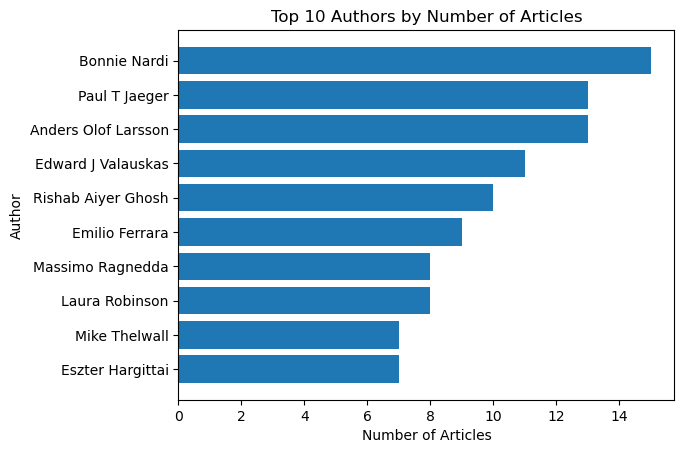

In [21]:
# Get the top 10 authors
top_10_authors = author_counts_df.head(10)

# Plot the top 10 authors
plt.barh(top_10_authors['author'], top_10_authors['number_of_articles'])
plt.xlabel('Number of Articles')
plt.ylabel('Author')
plt.title('Top 10 Authors by Number of Articles')
plt.gca().invert_yaxis()  # display the highest count at the top

### Distribution of Articles Over Time 
(Research papers only)

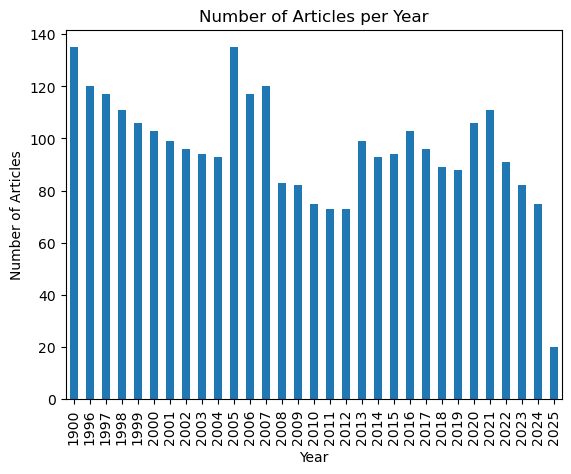

Average number of articles per year: 75.00


In [22]:
# Display how many articles in each year from publication_date column in bar plot 
articles_contents_df['article_publication_date'] = pd.to_datetime(articles_contents_df['article_publication_date'])
articles_contents_df['year'] = articles_contents_df['article_publication_date'].dt.year
articles_contents_df['year'].value_counts().plot(kind='bar')

# Display how many articles in each year from publication_date column in bar plot ordered by year asc
article_counts = articles_contents_df['year'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.title('Number of Articles per Year')
plt.show()

# Calculate the average number of articles per year
average_articles_per_year = articles_contents_df['year'].value_counts().median()
print(f"Average number of articles per year: {average_articles_per_year:.2f}")

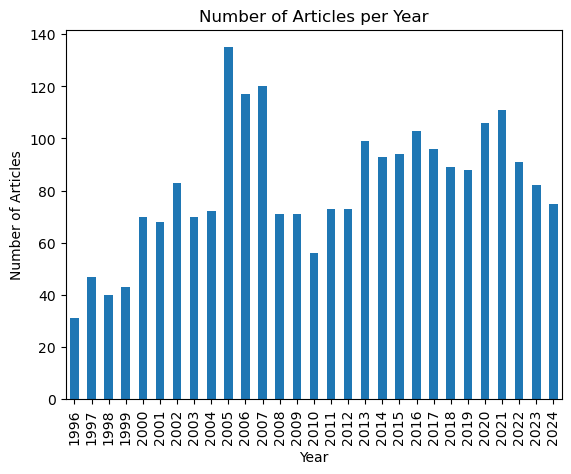

Average number of articles per year: 81.62


In [23]:
# Filter between 1996 to 2024 only.
filtered_articles_contents_df = articles_contents_df[(articles_contents_df['year'] >= 1996) & (articles_contents_df['year'] <= 2024)]

# Display how many articles in each year from publication_date column in bar plot ordered by year asc
article_counts = filtered_articles_contents_df['year'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.title('Number of Articles per Year')
plt.show()

# Calculate the average number of articles per year
average_articles_per_year = filtered_articles_contents_df['year'].value_counts().mean()
print(f"Average number of articles per year: {average_articles_per_year:.2f}")

### Word Clouds
(Research papers only)

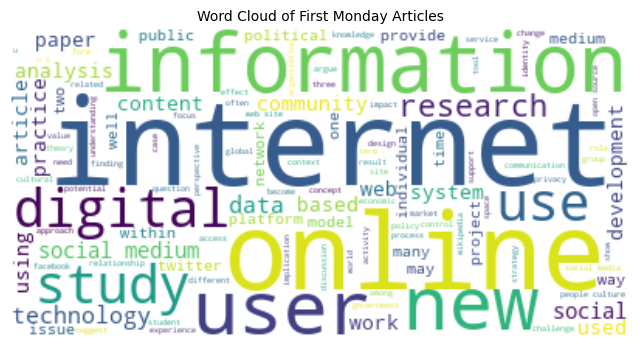

In [24]:
# Create a word of cloud of the document content, including title, abstract, keywords and content
from tqdm import tqdm

# Join the different processed abstracts together.
long_string = ','.join(list(articles_contents_df['abstract_content_clean_en'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
# wordcloud.to_image()
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Word Cloud of First Monday Articles", fontsize=10)
plt.show()

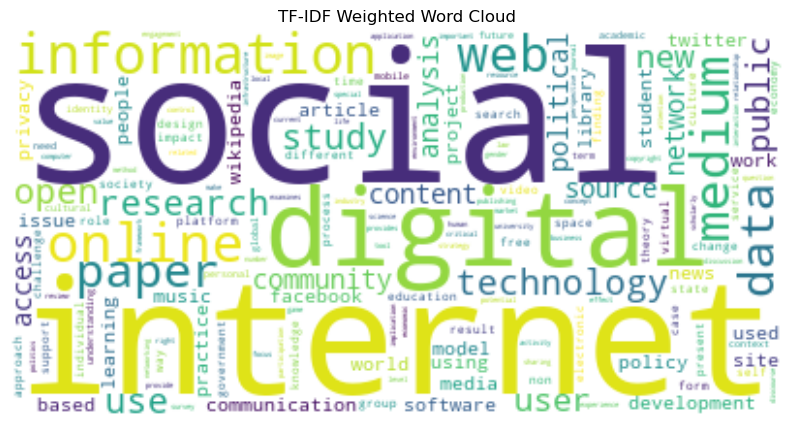

In [25]:
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=None, stop_words="english")
tfidf_matrix = vectorizer.fit_transform(articles_contents_df['abstract_content_clean_en'])
tfidf_scores = tfidf_matrix.sum(axis=0).A1
tfidf_vocab = vectorizer.get_feature_names_out()

# Create a word-weight dictionary
word_weights = dict(zip(tfidf_vocab, tfidf_scores))

# Generate word cloud using TF-IDF weights
wordcloud = WordCloud(background_color="white", contour_width=3)
wordcloud.generate_from_frequencies(word_weights)

# Plot the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("TF-IDF Weighted Word Cloud", fontsize=12)
plt.show()
